# Car Prediction Analysis

In [55]:
# importing the packages--
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
# reading the data file--
def read_data():
    data=pd.read_csv("C:/ANKITA/INTERNSHIP/OASIS INFOBYTE/DATA SCIENCE/Assignment 2/car data.csv ")
    return data

In [3]:
# calling the function--
data= read_data()
print(data.head(2))

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  


In [4]:
# copying the data--
data.copy()
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
# data analysis--
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [7]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
print(data.dtypes)

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object


In [10]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
# checking the missing values--
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [12]:
data.shape

(301, 9)

In [13]:
data.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


# Exploratory Data Analysis

<Axes: >

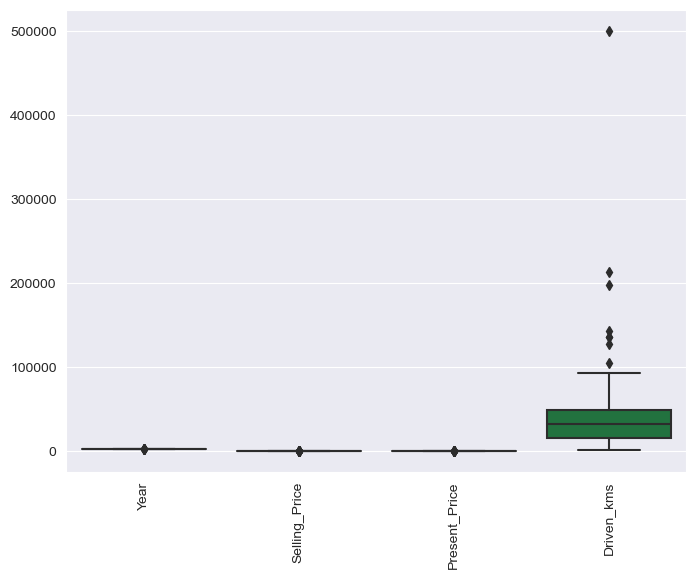

In [14]:
# checking the outliers--
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
plt.xticks(rotation=90,fontsize="medium")
sns.boxplot(data=data.loc[:, ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms']],palette="Greens")

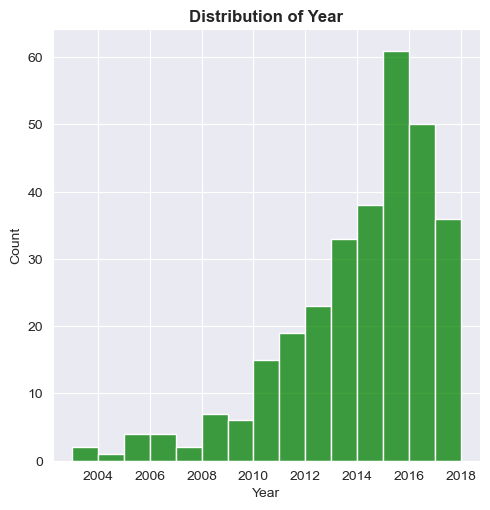

In [16]:
sns.displot(x=data["Year"],bins=15,color="green")
data["Year"].mean()
plt.title("Distribution of Year",fontweight="bold")
plt.show()

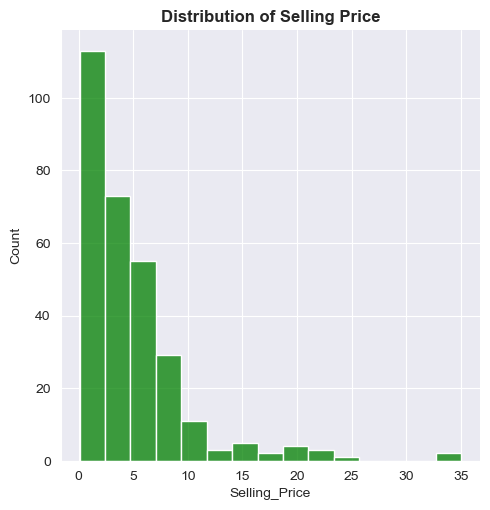

In [17]:
sns.displot(x=data["Selling_Price"],bins=15,color="green")
data["Selling_Price"].mean()
plt.title("Distribution of Selling Price",fontweight="bold")
plt.show()

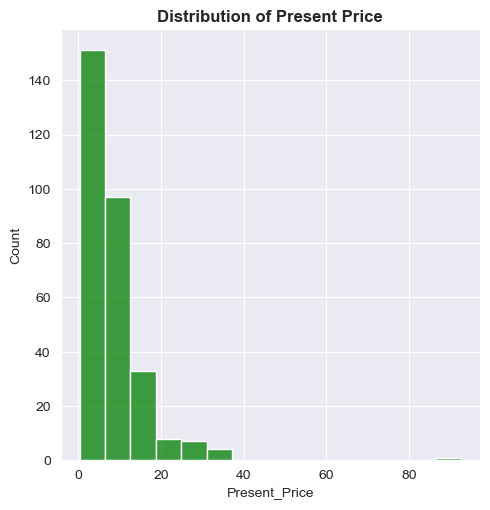

In [18]:
sns.displot(x=data["Present_Price"],bins=15,color="green")
data["Present_Price"].mean()
plt.title("Distribution of Present Price",fontweight="bold")
plt.show()

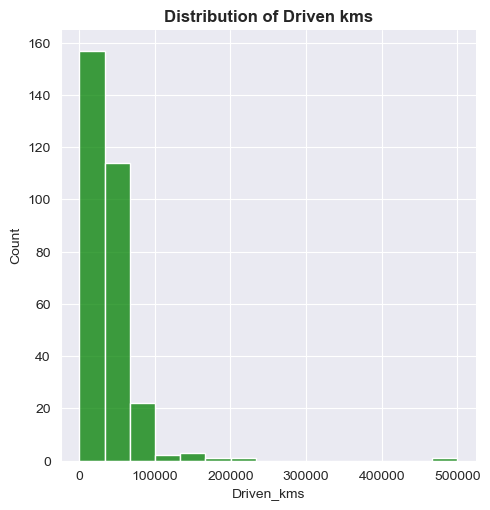

In [19]:
sns.displot(x=data["Driven_kms"],bins=15,color="green")
data["Driven_kms"].mean()
plt.title("Distribution of Driven kms",fontweight="bold")
plt.show()

<Axes: xlabel='Year', ylabel='count'>

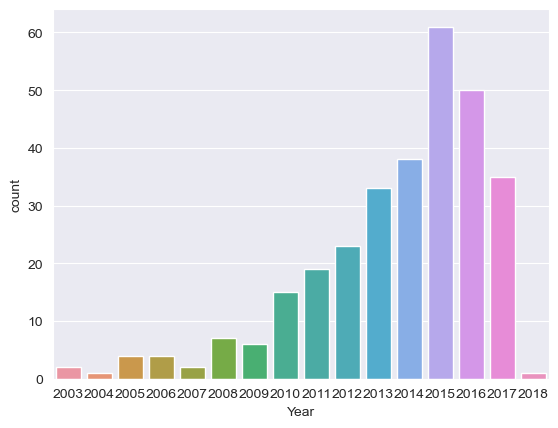

In [20]:
sns.countplot(x='Year', data=data)

<Axes: xlabel='Selling_Price', ylabel='count'>

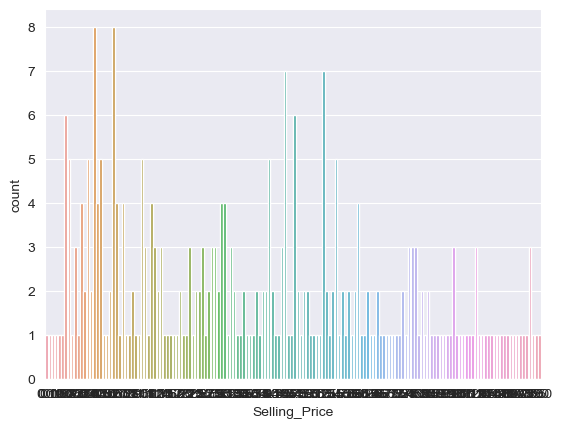

In [21]:
sns.countplot(x='Selling_Price', data=data)

<Axes: xlabel='Present_Price', ylabel='count'>

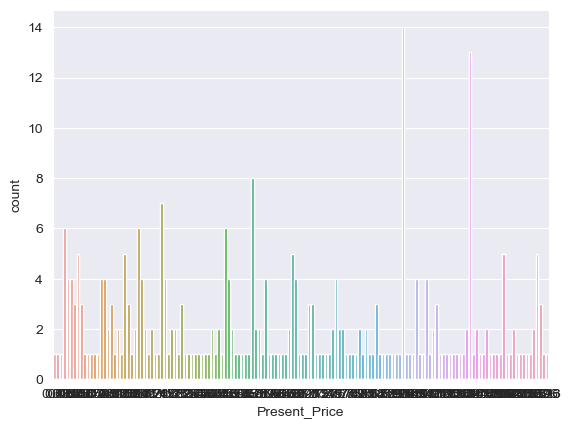

In [22]:
sns.countplot(x='Present_Price', data=data)

<Axes: xlabel='Driven_kms', ylabel='count'>

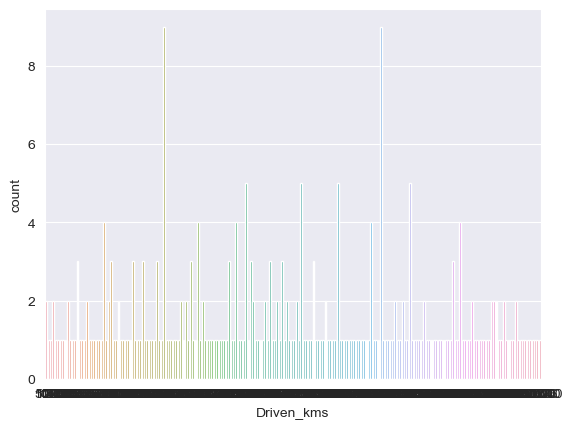

In [23]:
sns.countplot(x='Driven_kms', data=data)

<Axes: xlabel='Fuel_Type', ylabel='count'>

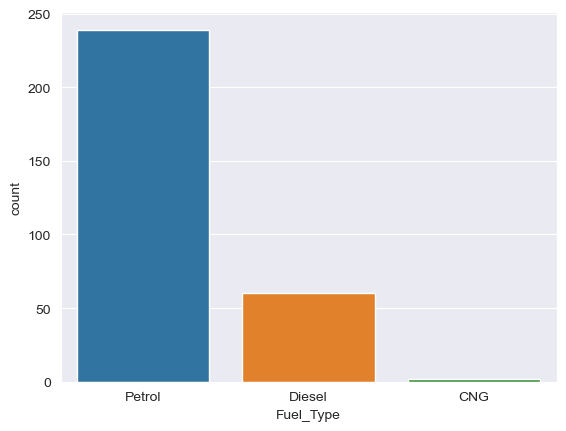

In [24]:
sns.countplot(x='Fuel_Type', data=data)

<Axes: xlabel='Selling_type', ylabel='count'>

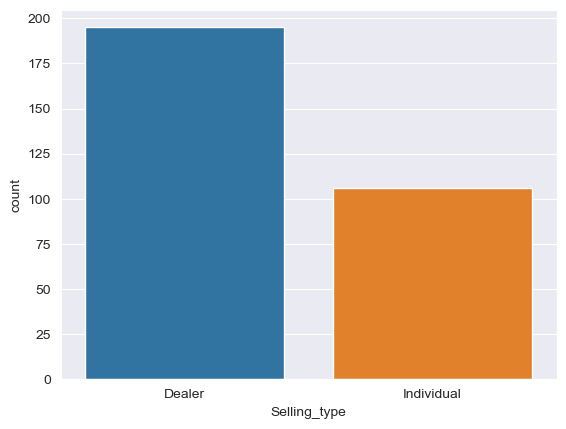

In [25]:
sns.countplot(x='Selling_type', data=data)

<Axes: xlabel='Transmission', ylabel='count'>

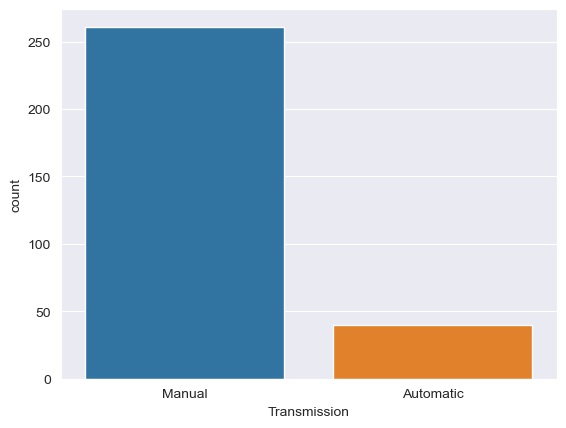

In [26]:
sns.countplot(x='Transmission', data=data)

<Axes: xlabel='Year', ylabel='Density'>

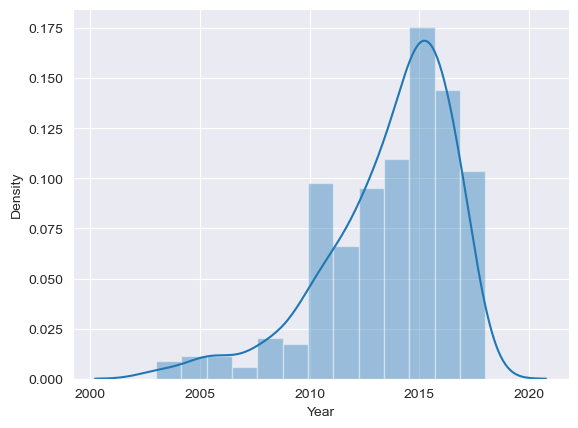

In [27]:
sns.distplot(data['Year'])

<Axes: xlabel='Selling_Price', ylabel='Density'>

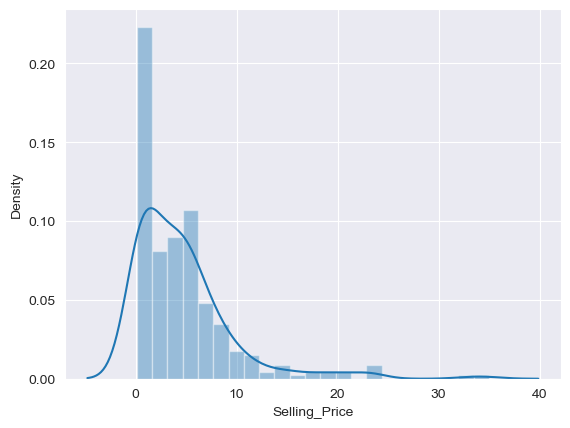

In [28]:
sns.distplot(data['Selling_Price'])

<Axes: xlabel='Present_Price', ylabel='Density'>

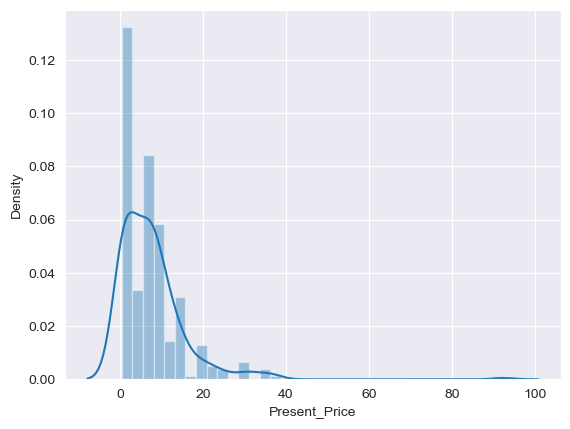

In [29]:
sns.distplot(data['Present_Price'])

<Axes: xlabel='Driven_kms', ylabel='Density'>

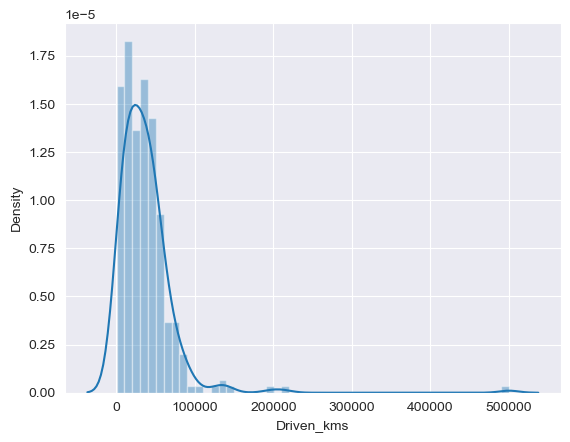

In [30]:
sns.distplot(data['Driven_kms'])

Year                Axes(0.125,0.11;0.0945122x0.77)
Selling_Price    Axes(0.238415,0.11;0.0945122x0.77)
Present_Price    Axes(0.351829,0.11;0.0945122x0.77)
Driven_kms       Axes(0.465244,0.11;0.0945122x0.77)
Owner            Axes(0.578659,0.11;0.0945122x0.77)
dtype: object

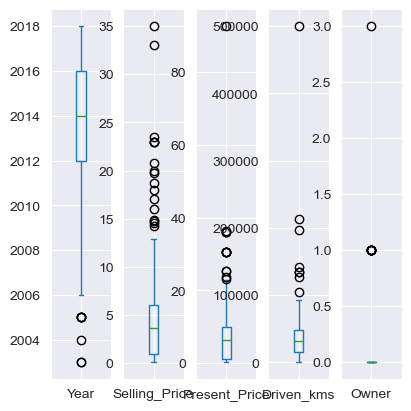

In [31]:
data.plot(kind ='box',subplots = True, layout =(1,7),sharex = False)

Text(0.5, 1.0, 'Year wise Selling Price')

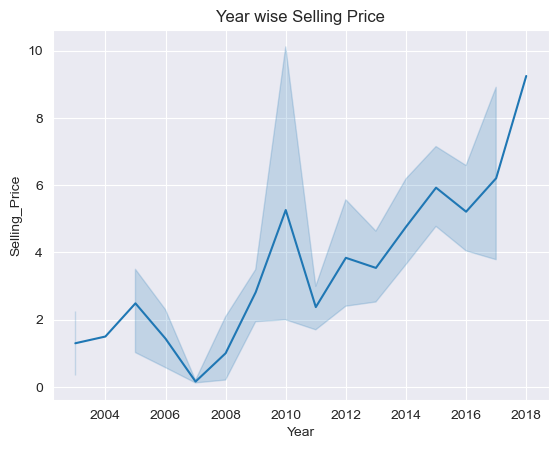

In [32]:
sns.lineplot(x="Year",y="Selling_Price",data=data)
plt.title("Year wise Selling Price")

Text(0.5, 1.0, 'Year v/s Present Price')

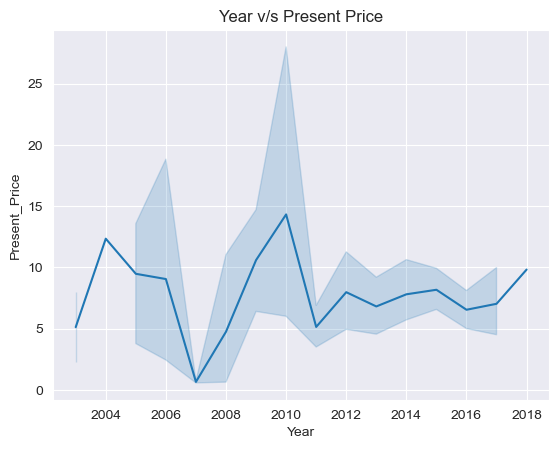

In [33]:
sns.lineplot(x="Year",y="Present_Price",data=data)
plt.title("Year v/s Present Price")

Text(0.5, 1.0, 'Selling Price v/s Present Price')

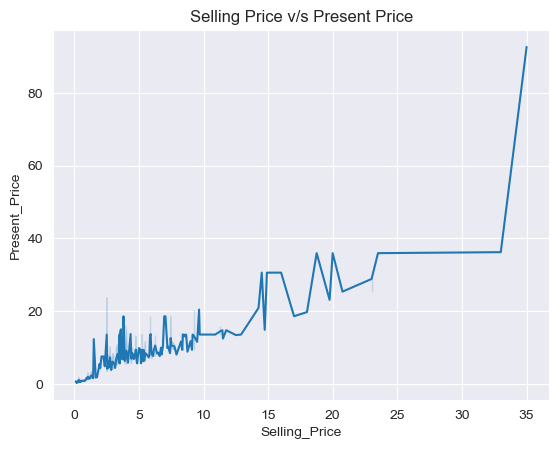

In [34]:
sns.lineplot(x="Selling_Price",y="Present_Price",data=data)
plt.title("Selling Price v/s Present Price")

Text(0.5, 1.0, 'Driven kms v/s Fuel Type')

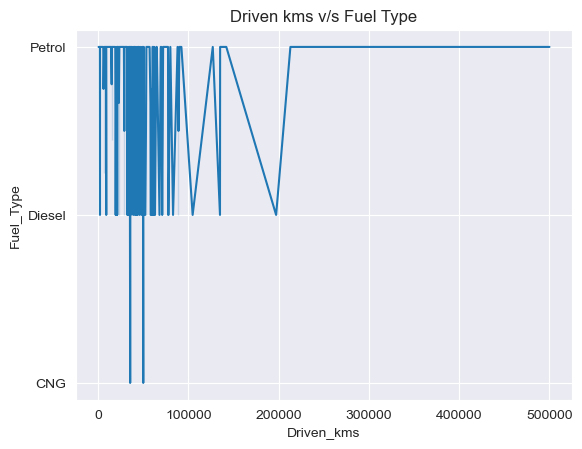

In [35]:
sns.lineplot(x="Driven_kms",y="Fuel_Type",data=data)
plt.title("Driven kms v/s Fuel Type")

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

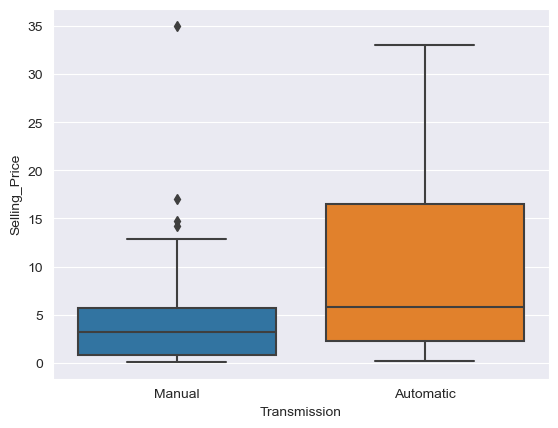

In [36]:
sns.boxplot(y ='Selling_Price', x = 'Transmission', data = data)

<Axes: xlabel='Selling_type', ylabel='Present_Price'>

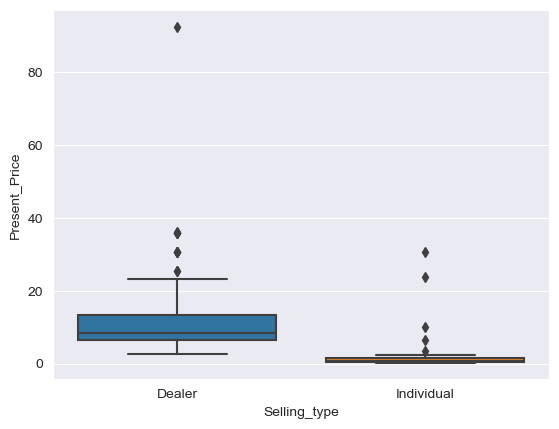

In [37]:
sns.boxplot(y ='Present_Price', x = 'Selling_type', data = data)

<Axes: xlabel='Fuel_Type', ylabel='Present_Price'>

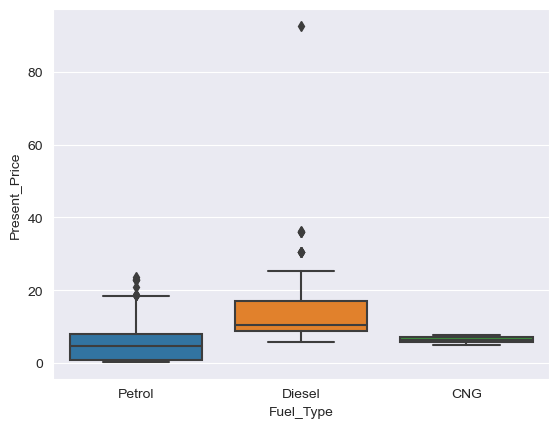

In [38]:
sns.boxplot(y = 'Present_Price', x = 'Fuel_Type', data = data)

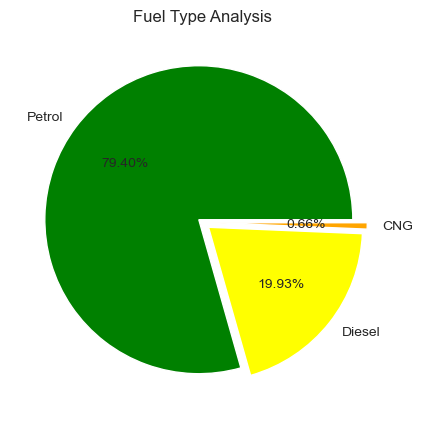

In [41]:
fuel_type=data['Fuel_Type'].value_counts()
label=['Petrol','Diesel','CNG']
plt.figure(figsize=(10,5))
plt.pie(fuel_type,labels=label, autopct='%1.2f%%',explode=[0.03,0.05,0.07],colors=['green','yellow','orange'])
plt.title("Fuel Type Analysis")
plt.show()

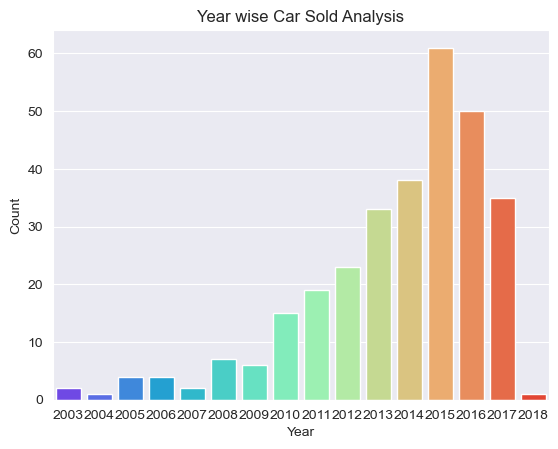

In [42]:
year=data['Year'].value_counts()
ax=plt.axes()
sns.set(rc={'figure.figsize':(16,8)},style='darkgrid')
ax.set_title("Year wise Car Sold Analysis")
sns.barplot(x=year.index,y=year,palette='rainbow')
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

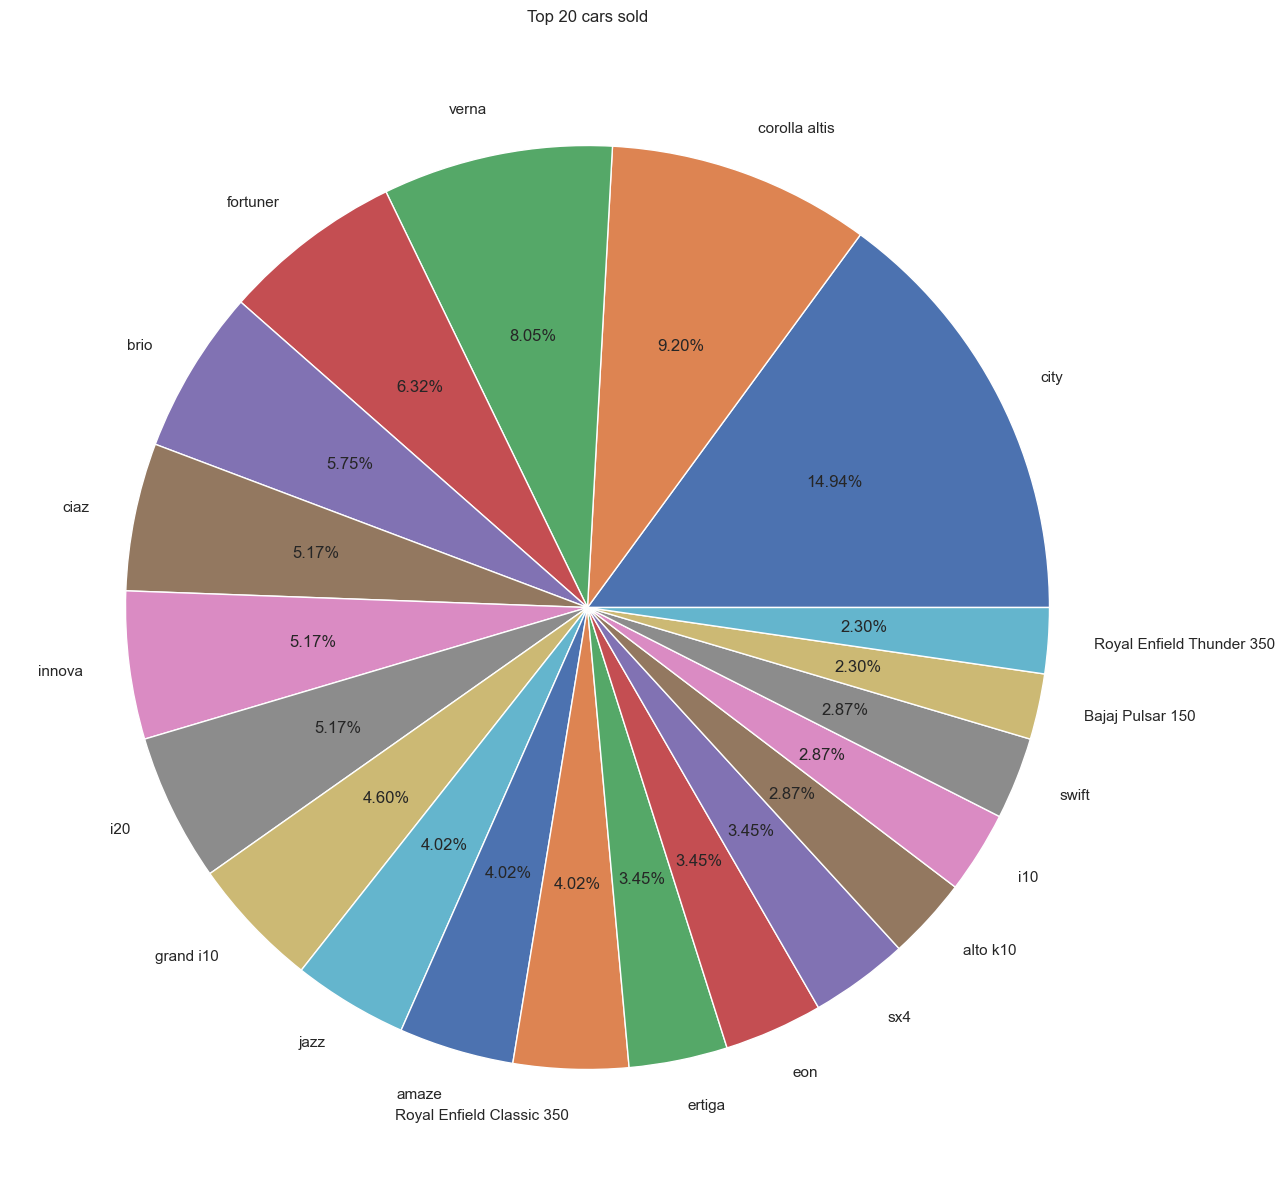

In [43]:
car_names=data['Car_Name'].value_counts()
label=['city','corolla altis','verna','fortuner','brio','ciaz','innova','i20','grand i10','jazz','amaze',
       'Royal Enfield Classic 350','ertiga','eon','sx4','alto k10','i10','swift','Bajaj Pulsar 150','Royal Enfield Thunder 350']
plt.figure(figsize=(25,15))
plt.pie(car_names[:20],labels=label, autopct='%1.2f%%')
plt.title("Top 20 cars sold")
plt.show()

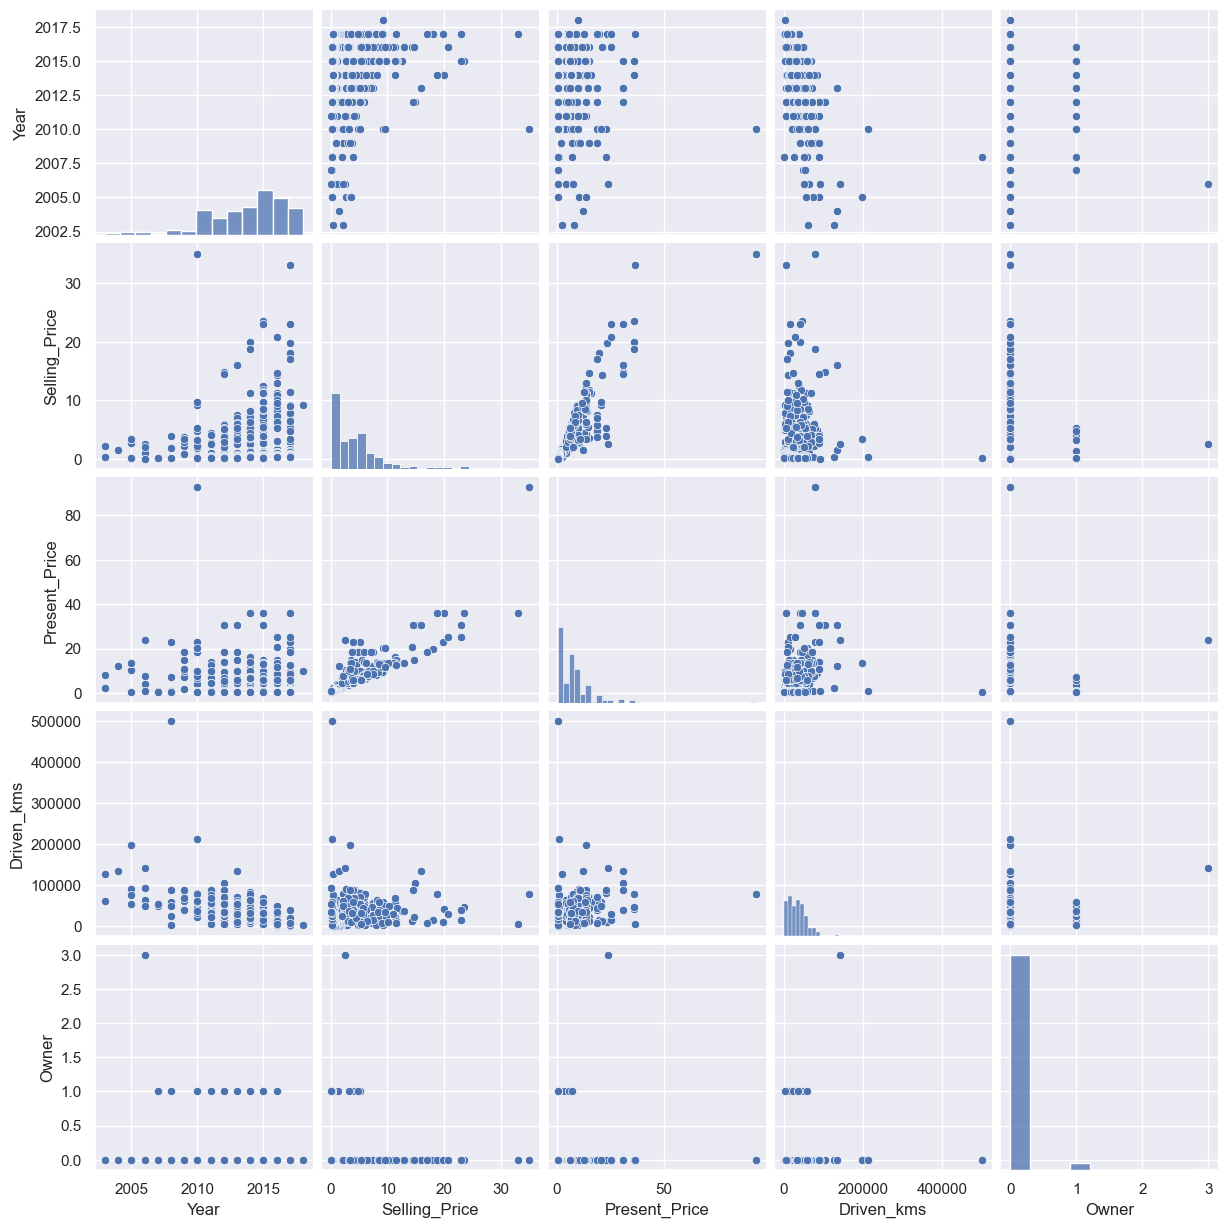

In [44]:
sns.pairplot(data)

<Axes: >

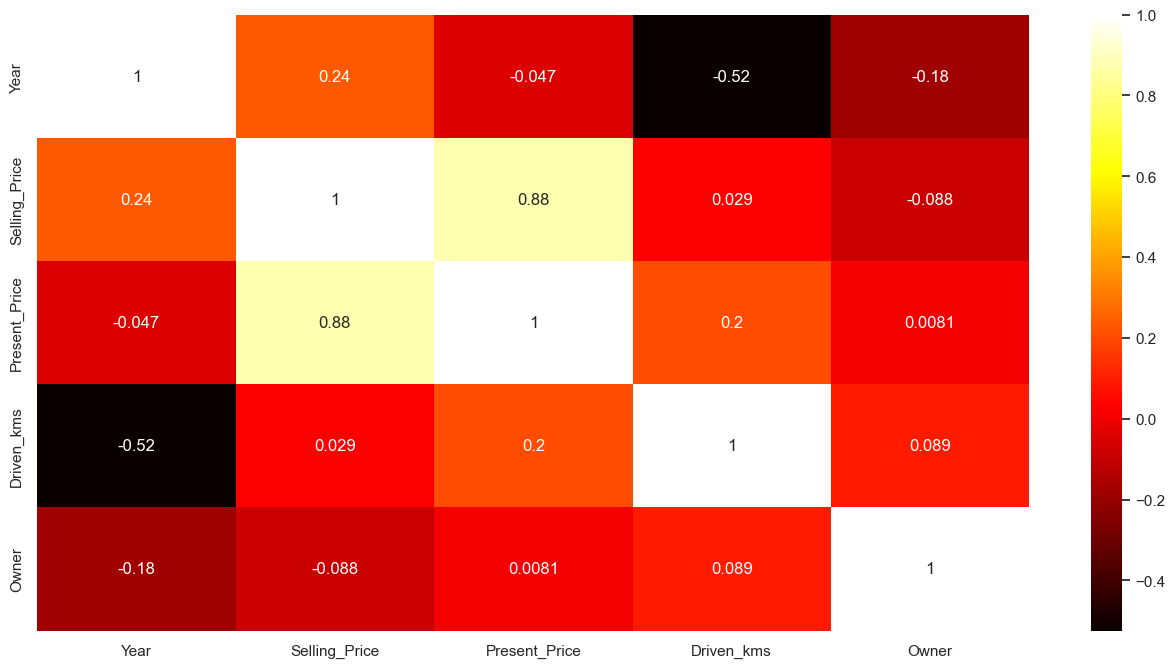

In [45]:
sns.heatmap(data.corr(),annot=True,cmap='hot')

# Data Processing

In [46]:
data.drop("Car_Name",axis=1,inplace=True)

In [47]:
data=pd.get_dummies(data,columns=['Fuel_Type','Selling_type','Transmission'])
data

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,1,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,0,1,1,0,0,1
298,2009,3.35,11.00,87934,0,0,0,1,1,0,0,1
299,2017,11.50,12.50,9000,0,0,1,0,1,0,0,1


# Feature Engineering

In [48]:
# scaling the data--
sc= StandardScaler()
sc1= StandardScaler()
scaled_data= data
scaled_data
scaled_data['Driven_kms']=sc.fit_transform(data[['Driven_kms']])
scaled_data['Selling_Price']=sc.fit_transform(data[['Selling_Price']])
scaled_data['Present_Price']=sc.fit_transform(data[['Present_Price']])
scaled_data['Year']=sc.fit_transform(data[['Year']])
df=scaled_data

In [56]:
# label encoding the data--
label=LabelEncoder()
data['Driven_kms']=label.fit_transform(data['Driven_kms'])
data['Selling_Price']=label.fit_transform(data['Selling_Price'])
data['Present_Price']=label.fit_transform(data['Present_Price'])
data['Year']=label.fit_transform(data['Year'])

# Model Building

In [57]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [58]:
# sampling of data--
def train_test(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
    print(X_train.shape),print(y_train.shape)
    print(X_test.shape),print(y_test.shape)
    return  X_train,X_test,y_train,y_test

In [59]:
# calling the train_test function--
X_train,X_test,y_train,y_test=train_test(X,y)

(240, 11)
(240,)
(61, 11)
(61,)


# Linear Regression

In [60]:
# defining--
def modelling1(X_train,y_train,X_test):
    model1=LinearRegression()
    model1_train=model1.fit(X_train,y_train)
    print("Model 1 training completed.")
    pred1=model1_train.predict(X_test)
    return pred1

In [61]:
# calling the model function--
pred1=modelling1(X_train,y_train,X_test)
pred1

Model 1 training completed.


array([ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -2.22044605e-16,
        1.00000000e+00,  1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00, -2.22044605e-16,  1.00000000e+00,
        1.00000000e+00,  2.22044605e-16,  1.00000000e+00,  1.00000000e+00,
       -2.22044605e-16,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  4.44089210e-16,
        0.00000000e+00,  1.00000000e+00,  1.00000000e+00,  2.22044605e-16,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  6.66133815e-16,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.22124533e-15,  1.00000000e+00,
        1.00000000e+00,  

In [62]:
r2score_LR=(round(r2_score(y_test,pred1)*100,2))
print('r2score:',r2score_LR)

r2score: 100.0


In [63]:
rmse = m.sqrt(mean_squared_error(y_test,pred1))
print('RMSE:',rmse)

RMSE: 4.132127055012251e-16


In [64]:
mae=mean_absolute_error(y_test,pred1)
print('MAE:', mae)

MAE: 3.185066054252498e-16


# Linear Support Vector Regression

In [94]:
# defining--
def modelling2(X_train,y_train,X_test):
    model2=LinearSVR()
    model2_train=model2.fit(X_train,y_train)
    print("Model 2 training completed.")
    pred2=model2_train.predict(X_test)
    return pred2

In [95]:
# calling the model function--
pred2=modelling2(X_train,y_train,X_test)
pred2

Model 2 training completed.


array([1.31844876, 1.03299675, 0.99997111, 0.08559668, 1.11189369,
       1.04713629, 0.2644441 , 1.04466895, 1.33906811, 1.13429072,
       0.06602113, 1.10278241, 1.14434137, 0.25564722, 1.16160765,
       1.19424513, 0.21892003, 0.99872165, 1.16050241, 1.17867438,
       1.14382995, 1.28559298, 1.05991423, 1.03541761, 1.35064707,
       1.14100503, 1.11680236, 0.34614084, 0.05357212, 1.0097609 ,
       1.10308412, 0.31770347, 1.05743258, 1.15533269, 1.19672331,
       0.94761931, 1.17859639, 1.17193394, 0.27927901, 1.01903601,
       1.05172433, 1.09649843, 1.15399207, 1.17273344, 1.09011967,
       1.40996303, 1.08759764, 1.02018589, 1.17834345, 1.02629011,
       0.43940363, 1.12142309, 1.04794381, 1.16832065, 1.09951655,
       1.10091219, 0.12875258, 0.51670595, 1.15891391, 1.01262105,
       1.02938439])

In [72]:
r2score_LSV1=(round(r2_score(y_test,pred2)*100,2))
print('r2score:',r2score_LSV1)

r2score: 95.45


In [73]:
rmse = m.sqrt(mean_squared_error(y_test,pred2))
print('RMSE:',rmse)

RMSE: 0.08483306637462858


In [74]:
mae=mean_absolute_error(y_test,pred2)
print('MAE:', mae)

MAE: 0.06669811172384882


In [92]:
details = {
    'Model' : ['Linear Regression','Linear Support Vector Regression'],
    'Accuracy %' : [r2score_LR,r2score_LSV1]}
df = pd.DataFrame(details)
df

,Model,Accuracy %
0,Linear Regression,100.00
1,Linear Support Vector Regression,95.45


(array([0, 1]),
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Linear Support Vector Regression')])

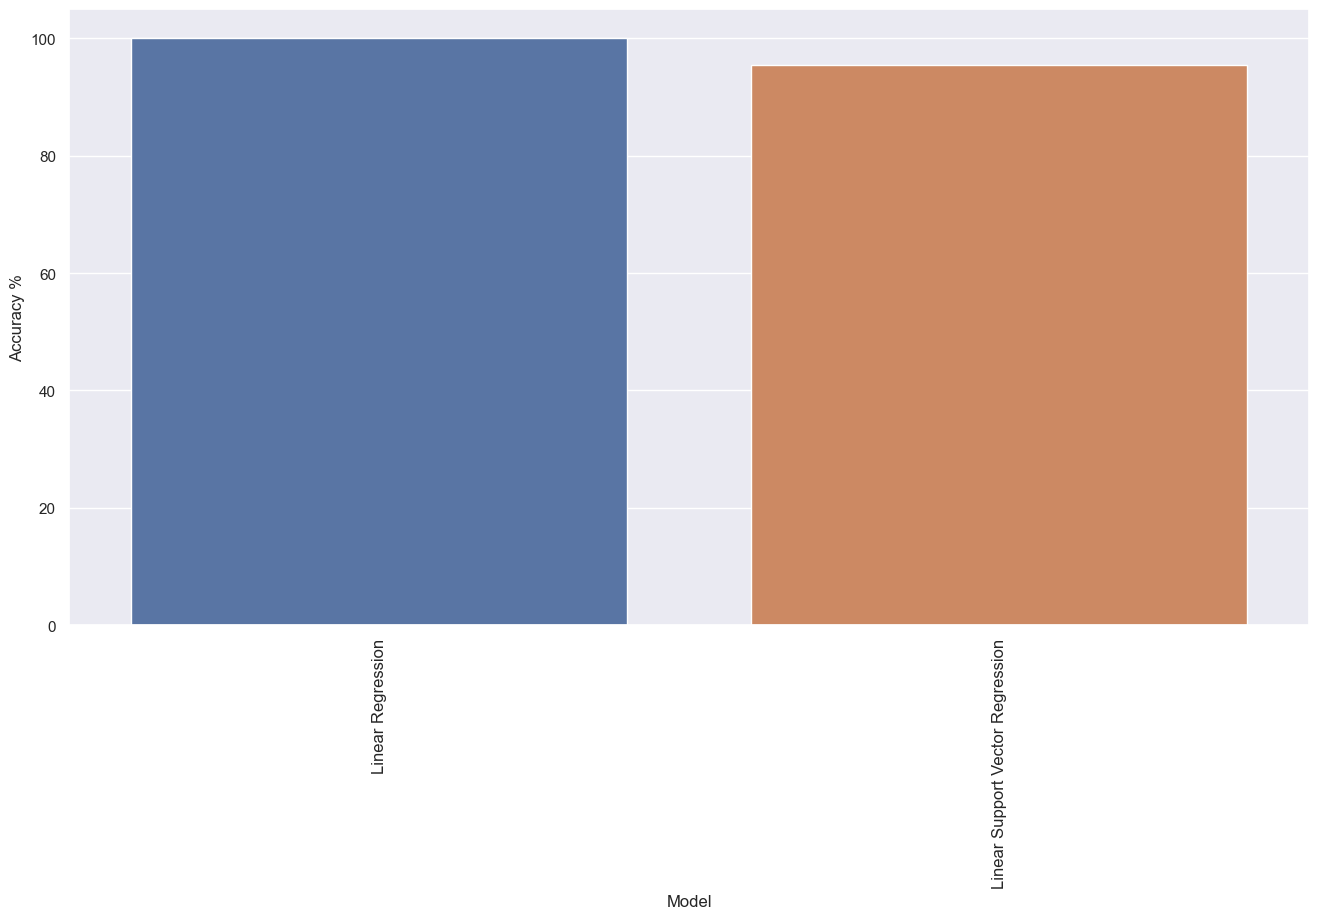

In [93]:
sns.barplot( x = df['Model'],y = df['Accuracy %'])
plt.xticks(rotation=90,fontsize="medium")